In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

In [10]:
base_dir = '/content/drive/MyDrive/dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [11]:
os.listdir('/content/drive/MyDrive/dataset/images/train')

['messy', 'clean']

In [12]:
os.listdir('/content/drive/MyDrive/dataset/images/val')

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join (train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_massy_dir = os.path.join(train_dir, 'massy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_massy_dir = os.path.join(validation_dir, 'massy')

Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

proses augmentasi gambar pada setiap sampel di dataset. Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

Lalu kita dapat menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [28]:
train_generator = train_datagen.flow_from_directory (
    train_dir,  # direktori data latih
    target_size = (150,150),    # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4,  
    class_mode = 'binary'  # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'binary'
)
print("========================================================================================")

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Setelah data telah siap, kita bisa membangun arsitektur sebuah CNN. Sebuah CNN pada keras mirip dengan MLP untuk klasifikasi fashion MNIST yang kita bahas sebelumnya. Perbedaannya hanya pada terdapatnya 2 lapis layer konvolusi dan max pooling. Anda tentu masih ingat bahwa fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [29]:
#Arsitektur CNN
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    tf.keras.layers.Dense(1, activation= 'sigmoid')

])

Setelah membuat arsitektur dari CNN, jangan lupa untuk memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [30]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics = ['accuracy']
)

Setelah menentukan loss function dan optimizer pada CNN, kita dapat melatih model kita menggunakan metode fit. Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label “clean” oleh image data generator.

In [31]:
# latih model dengan model.fit 
model.fit(
    train_generator,
    steps_per_epoch = 25,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20,  # tambahkan eposchs jika akurasi model belum optimal
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps = 5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose = 2)

Epoch 1/20
25/25 - 29s - loss: 0.7344 - accuracy: 0.5700 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 13s - loss: 0.6920 - accuracy: 0.5400 - val_loss: 0.6809 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 9s - loss: 0.6828 - accuracy: 0.6100 - val_loss: 0.6363 - val_accuracy: 0.7500
Epoch 4/20
25/25 - 7s - loss: 0.7699 - accuracy: 0.6700 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 7s - loss: 0.6698 - accuracy: 0.6600 - val_loss: 0.6767 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 7s - loss: 0.6632 - accuracy: 0.5500 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 7s - loss: 0.7092 - accuracy: 0.6600 - val_loss: 0.7508 - val_accuracy: 0.6000
Epoch 8/20
25/25 - 7s - loss: 0.6966 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.6906 - accuracy: 0.5400 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 7s - loss: 0.6955 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 11/20
25/25

selanjutnya memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar, kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy. Prediksi dari model kita:

Saving 4.png to 4.png
4.png
Berantakan


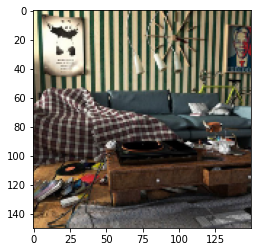

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('Bersih/Rapih')
  else:
    print('Berantakan')